<a href="https://colab.research.google.com/github/ahmad-bsds/mnist-classification-ml/blob/main/MNIST_Classification_using_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

## Using MNIST data as Hello-World.

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False) # Dataframe isn't suitable for that dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
# Extracting data.
X, y = mnist.data, mnist.target

## Exploring the data.

In [7]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

- Total images data = 70,000

- Each image has: 28 * 28 = 784 pixels

- Each image has 0-225 intensity from white to black


In [6]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [5]:
y.shape

(70000,)

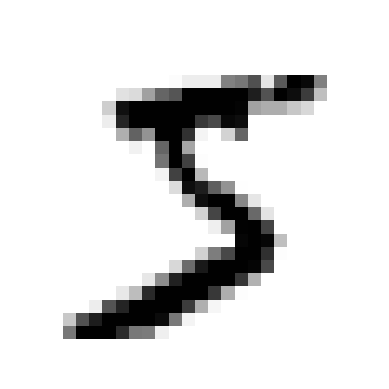

In [17]:
def plot_digit(image_data):
  # Reshaping image data in matrix of 28*28.
  image = image_data.reshape(28, 28)
  # Showing image in grey scale.
  plt.imshow(image, cmap='binary')
  plt.axis('off')

# Let's plot digit at index 0.
some_digit = X[0]
plot_digit(some_digit)
plt.show()

## Splitting data.

In [20]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

The training set is already shuffled for us, which is good because this
guarantees that all cross-validation folds will be similar (we don’t want one
fold to be missing some digits). Moreover, some learning algorithms are
sensitive to the order of the training instances, and they perform poorly if
they get many similar instances in a row. Shuffling the dataset ensures that
this won’t happen.

## Let's try to identify only one digit, i.e 5.
This is an example of binary classification whether the digit is 5 or not.
So, we will use Stocastic Gradient Descent (SGD Classifier) for classifying. This classifier is capable of handling very large datasets efficiently. This is in part because **SGD deals with training
instances independently, one at a time**, which also makes SGD well suited
for online learning, as you will see later. Let’s create an SGDClassifier
and train it on the whole training set:

In [21]:
# Getting 5's data for binary classification.
y_train_5 = (y_train == '5') # True for all 5's ,  False for all other digits.
y_test_5 = (y_test == '5')

In [22]:
# Fitting the model.
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [25]:
# Predicting the digit.
sgd_clf.predict([some_digit]) # some_degit was 5 at index 0.

array([ True])

## Performance Measure.

### Measuring accuracy with Cross-Validation.

In [2]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

NameError: name 'cross_val_score' is not defined

.....